In [66]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2006)

# 1 task

In [79]:
# matrix
matr = np.zeros((100, 100))
t=200
while np.sum(matr) <= 400:
    i = np.random.randint(0, 100)
    j = np.random.randint(0, 100)
    if i!=j and matr[i,j] != 1:
        matr[i,j] = 1
        matr[j,i] = 1

In [80]:
# matrix to list
adlist = {}
    
for i in range(100):
    adlist[i] = []
    for j in range(100):
        if matr[i][j]==1:
            adlist[i].append(j)
print(adlist)

{0: [],
 1: [40, 52, 68, 83, 91],
 2: [62, 75, 83],
 3: [27, 35, 38, 57, 61, 66, 77, 79],
 4: [45, 91, 95, 98],
 5: [48, 74],
 6: [56, 57],
 7: [9, 10, 15, 39, 53, 60, 92, 93],
 8: [26, 44, 50, 83, 85],
 9: [7, 20, 40, 56, 70, 72, 81],
 10: [7, 47, 90],
 11: [36, 38, 47, 48, 70, 89],
 12: [28, 43, 71],
 13: [23, 62, 79],
 14: [19, 99],
 15: [7, 21, 34, 45, 71],
 16: [38, 53, 56, 67, 84, 89],
 17: [50, 54],
 18: [34, 41, 47, 92],
 19: [14, 39],
 20: [9],
 21: [15, 22, 23, 75, 94],
 22: [21, 29, 38, 39, 70, 75, 78, 86, 93],
 23: [13, 21, 57, 68, 76],
 24: [26, 31, 32, 43, 63, 91],
 25: [48],
 26: [8, 24, 38],
 27: [3, 58, 87],
 28: [12],
 29: [22, 64, 75],
 30: [32, 48, 51, 53, 99],
 31: [24, 58, 91],
 32: [24, 30, 53, 74],
 33: [35, 84, 92],
 34: [15, 18, 74],
 35: [3, 33, 43, 65, 80, 81],
 36: [11, 45, 86],
 37: [94],
 38: [3, 11, 16, 22, 26, 74, 81],
 39: [7, 19, 22, 48, 72, 95],
 40: [1, 9, 70],
 41: [18, 42, 51, 70, 79, 95, 96],
 42: [41, 64, 70],
 43: [12, 24, 35, 61, 92],
 44: [8]

In [118]:
# check the isolated nodes
for i in range(len(adlist)):
    if len(adlist[i]) == 0:
        print(i)

0


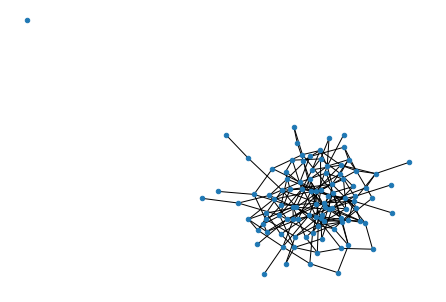

In [117]:
gr = nx.Graph(adlist)

nx.draw(gr, node_size = 20)
plt.show()

# 2 task

In [131]:
def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for n in graph[node]:
            dfs(graph,n, visited)
    return visited

visited = dfs(adlist,9, [])
print(visited)

[9, 7, 10, 47, 11, 36, 45, 4, 91, 1, 40, 70, 22, 21, 15, 34, 18, 41, 42, 64, 29, 75, 2, 62, 13, 23, 57, 3, 27, 58, 31, 24, 26, 8, 44, 50, 17, 54, 69, 95, 39, 19, 14, 99, 30, 32, 53, 16, 38, 74, 5, 48, 25, 83, 93, 77, 66, 71, 12, 28, 43, 35, 33, 84, 89, 96, 52, 73, 82, 49, 63, 78, 55, 80, 85, 90, 97, 92, 88, 76, 98, 65, 60, 81, 79, 61, 59, 72, 67, 86, 56, 6, 46, 51, 87, 68, 94, 37, 20]


In [132]:
visited = dfs(adlist,0, [])
print(visited)

[0]


In [135]:
def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path
        

def bfs(graph, start, end):
    parent = {}
    queue = []
    queue.append(start)
    while queue:
        node = queue.pop(0)
        if node == end:
            return backtrace(parent, start, end)
        for adjacent in graph.get(node, []):
            if node not in queue :
                parent[adjacent] = node # <<<<< record its parent 
                queue.append(adjacent)

print(bfs(adlist, 1, 3))
print(bfs(adlist, 0, 3))

[1, 52, 57, 3]
None
